<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project2.do.txt  -->
<!-- dom:TITLE: Project 2 on Machine Learning, deadline November 13 (Midnight) -->

# Project 2 on Machine Learning, deadline November 13 (Midnight)
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, Department of Physics, University of Oslo, Norway

Date: **Oct 9, 2023**

Copyright 1999-2023, [Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html). Released under CC Attribution-NonCommercial 4.0 license

## Classification and Regression, from linear and logistic regression to neural networks

The main aim of this project is to study both classification and
regression problems by developing our own feed-forward neural network
(FFNN) code. We can reuse the regression algorithms studied in project
1. We will also include logistic regression for classification
problems and write our own FFNN code for studying both regression and
classification problems.  The codes developed in project 1, including
bootstrap **and/or** cross-validation as well as the computation of the
mean-squared error and/or the $R2$ or the accuracy score
(classification problems) functions can also be utilized in the
present analysis.

The data sets that we propose here are (the default sets)

* Regression (fitting a continuous function). In this part you will need to bring back your results from project 1 and compare these with what you get from your Neural Network code to be developed here. The data sets could be

a. A simple one-dimensional function or the Franke function or the terrain data from project 1, or data sets your propose. It could be a simpler function than the Franke function. We recommend testing a simpler function (see below). But if you wish to try more complex function, feel free to do so.

* Classification. Here you will also need to develop a Logistic regression code that you will use to compare with the Neural Network code. The data set we propose are the so-called [Wisconsin Breat Cancer Data](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) data set of images representing various features of tumors. These are discussed intensively in the lecture notes, see for example the slides from [week 41](https://compphysics.github.io/MachineLearning/doc/pub/week41/html/week41.html). A longer explanation with links to the scientific literature can be found at the [Machine Learning repository of the University of California at Irvine](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). Feel free to consult this site and the pertinent  literature.

You can find more information about this at the [Scikit-Learn site](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) or at the [University of California at Irvine](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)). 

However, if you would like to study other data sets, feel free to
propose other sets. What we list here are mere suggestions from our
side. If you opt for another data set, consider using a set which has
been studied in the scientific literature. This makes it easier for
you to compare and analyze your results. Comparing with existing
results from the scientific literature is also an essential element of
the scientific discussion.  The University of California at Irvine
with its Machine Learning repository at
<https://archive.ics.uci.edu/ml/index.php> is an excellent site to
look up for examples and
inspiration. [Kaggle.com](https://www.kaggle.com/) is an equally
interesting site. Feel free to explore these sites.

We will start with a regression problem and we will reuse our codes from project 1 starting with writing our own Stochastic Gradient Descent (SGD) code.

<h1>Imports<h1>

In [109]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from random import random, seed
import matplotlib.pyplot as plt
import numpy as np
import autograd.numpy as np
from autograd import grad, elementwise_grad
from sklearn.metrics import accuracy_score
# import scikitplot as skplt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.exceptions import ConvergenceWarning

<h1>Make design matrices from breast cancer data<h1>

In [110]:
cancer = load_breast_cancer()

#Splitting data 4/5 train and 1/5 test, so more data to train than test
X, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=0)

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)
y = y_train.reshape(-1,1) # (455,1)

print(y.shape)
print(X.shape)
print(X_test.shape)

n = X.shape[0] # 455

# Hessian matrix
H = (2.0/n)* X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
# print(f"Eigenvalues of Hessian Matrix:{EigValues}")

beta_start = np.random.randn(X.shape[1], 1)

(455, 1)
(455, 30)
(114, 30)


In [111]:
X_test = scaler.transform(X_test)
y = y_train.reshape(-1,1) # (455,1)

print(y.shape)
print(X.shape)
print(X_test.shape)

n = X.shape[0] # 455

# Hessian matrix
H = (2.0/n)* X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
# print(f"Eigenvalues of Hessian Matrix:{EigValues}")

beta_start = np.random.randn(X.shape[1], 1)

(455, 1)
(455, 30)
(114, 30)


### Part a): Write your own Stochastic Gradient Descent  code, first step

In order to get started, we will now replace in our standard ordinary
least squares (OLS) and Ridge regression codes (from project 1) the
matrix inversion algorithm with our own gradient descent (GD) and SGD
codes.  You can use the Franke function or the terrain data from
project 1. **However, we recommend using a simpler function like**
$f(x)=a_0+a_1x+a_2x^2$ or higher-order one-dimensional polynomials.
You can obviously test your final codes against for example the Franke
function.

You should include in your analysis of the GD and SGD codes the following elements
1. A plain gradient descent with a fixed learning rate (you will need to tune it) using the analytical expression for the gradient.

2. Add momentum to the plain GD code and compare convergence with a fixed learning rate (you may need to tune the learning rate). Keep using the analytical expression for the gradient.

3. Repeat these steps for stochastic gradient descent with mini batches and a given number of epochs. Use a tunable learning rate as discussed in the lectures from weeks 39 and 40. Discuss the results as functions of the various parameters (size of batches, number of epochs etc). Use the analytical gradient.

4. Implement the Adagrad method in order to tune the learning rate. Do this with and without momentum for plain gradient descent and SGD.

5. Add RMSprop and Adam to your library of methods for tuning the learning rate.

The lecture notes from [weeks 39 and 40contain more
details](https://compphysics.github.io/MachineLearning/doc/pub/week39/html/week39.html) and code examples. Feel free to use these examples.
1. Replace thereafter your analytical gradient with either **Autograd** or **JAX**

In summary, you should 
perform an analysis of the results for OLS and Ridge regression as
function of the chosen learning rates, the number of mini-batches and
epochs as well as algorithm for scaling the learning rate. You can
also compare your own results with those that can be obtained using
for example **Scikit-Learn**'s various SGD options.  Discuss your
results. For Ridge regression you need now to study the results as functions of  the hyper-parameter $\lambda$ and 
the learning rate $\eta$.  Discuss your results.

You will need your SGD code for the setup of the Neural Network and
Logistic Regression codes. You will find the Python [Seaborn
package](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
useful when plotting the results as function of the learning rate
$\eta$ and the hyper-parameter $\lambda$ when you use Ridge
regression.

We recommend reading chapter 8 on optimization from the textbook of [Goodfellow, Bengio and Courville](https://www.deeplearningbook.org/). This chapter contains many useful insights and discussions on the optimization part of machine learning.

### Setting up the plots variables

In [112]:
xnew = X_test
x = np.arange(len(y_test))

### Numpy Inversion and Logistic Regression (ScikitLearn)

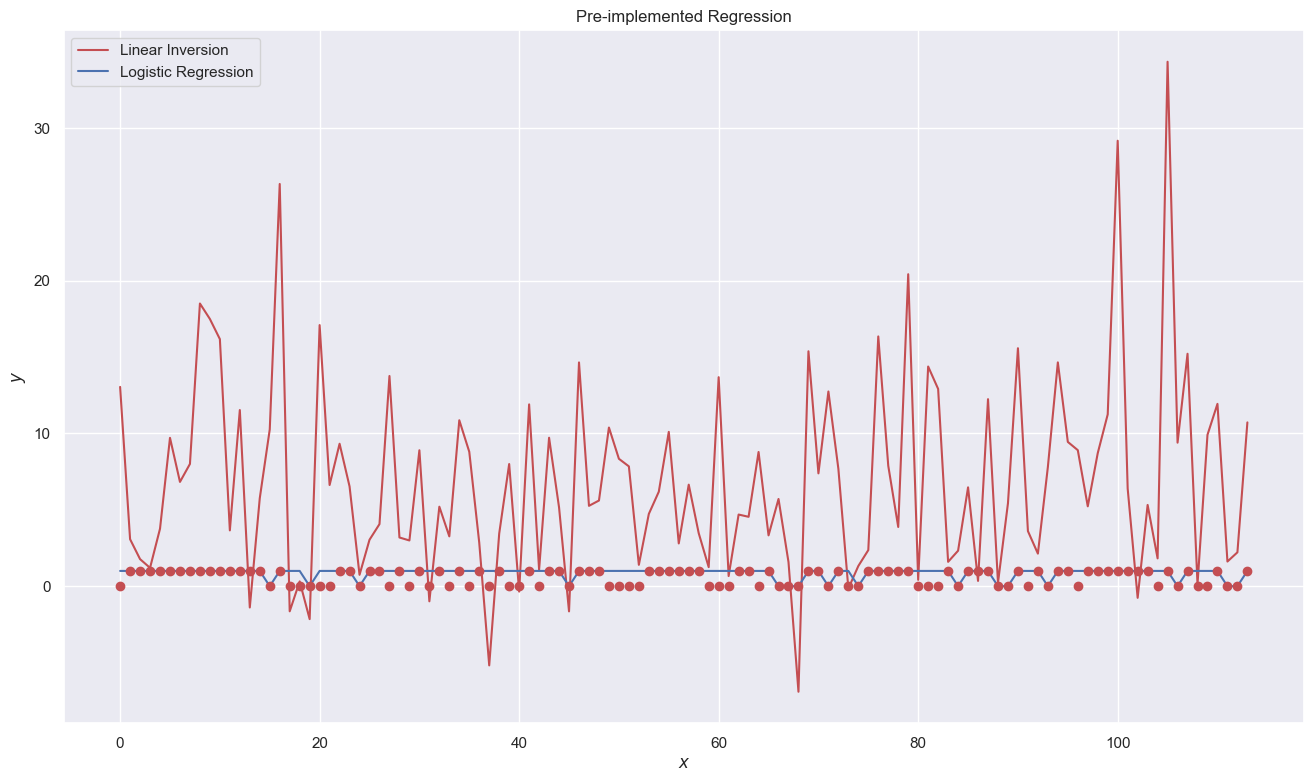

NameError: name 'skplt' is not defined

In [113]:
beta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
# print(beta_linreg)

beta_logistic = LogisticRegression(solver='lbfgs')
beta_logistic.fit(X, y_train)

ypredict_linreg = xnew.dot(beta_linreg)
ypredict_logistic = beta_logistic.predict(xnew)

plt.figure(figsize=(16,9))
plt.plot(x, ypredict_linreg, "r-", label = "Linear Inversion")
plt.plot(x, ypredict_logistic, "b-", label = "Logistic Regression")
plt.plot(x, y_test ,'ro')
# plt.axis([0,len(X_test),-1,2])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Pre-implemented Regression')
plt.legend()
plt.show()

ypredict_logistic_binary = [1 if x >= 0.5 else 0 for x in ypredict_logistic]
ypredict_linreg_binary = [1 if x >= 0.5 else 0 for x in ypredict_linreg]

skplt.metrics.plot_confusion_matrix(y_test, ypredict_linreg_binary, normalize=True)
skplt.metrics.plot_confusion_matrix(y_test, ypredict_logistic_binary, normalize=True)
plt.plot()

### Part b): Writing your own Neural Network code

Your aim now, and this is the central part of this project, is to
write your own Feed Forward Neural Network  code implementing the back
propagation algorithm discussed in the lecture slides from [week 40](https://compphysics.github.io/MachineLearning/doc/pub/week41/html/week40.html) and
[week 41](https://compphysics.github.io/MachineLearning/doc/pub/week41/html/week41.html).

We will focus on a regression problem first and study either the simple second-order polynomial from part a) or the 
Franke function or terrain data (or both or other data sets) from
project 1.

Discuss again your choice of cost function.

Write an FFNN code for regression with a flexible number of hidden
layers and nodes using the Sigmoid function as activation function for
the hidden layers. Initialize the weights using a normal
distribution. How would you initialize the biases? And which
activation function would you select for the final output layer?

Train your network and compare the results with those from your OLS and Ridge Regression codes from project 1 if you use the Franke function or the terrain data.
You should test your results against a similar code using **Scikit-Learn** (see the examples in the above lecture notes from week 41) or **tensorflow/keras**. 

Comment your results and give a critical discussion of the results
obtained with the Linear  Regression code and your own Neural Network
code.  
Make an analysis of the regularization parameters and the learning rates employed to find the optimal MSE and $R2$ scores.

A useful reference on the back progagation algorithm is [Nielsen's
book](http://neuralnetworksanddeeplearning.com/). It is an excellent
read.

<>:137: SyntaxWarning: invalid escape sequence '\e'
<>:138: SyntaxWarning: invalid escape sequence '\l'
<>:137: SyntaxWarning: invalid escape sequence '\e'
<>:138: SyntaxWarning: invalid escape sequence '\l'
C:\Users\31622\AppData\Local\Temp\ipykernel_29224\27121983.py:137: SyntaxWarning: invalid escape sequence '\e'
  ax.set_ylabel("$\eta$")
C:\Users\31622\AppData\Local\Temp\ipykernel_29224\27121983.py:138: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda$")
c:\Users\31622\AppData\Local\Programs\Python\Python312\Lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
c:\Users\31622\AppData\Local\Programs\Python\Python312\Lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
c:\Users\31622\AppData\Local\Programs\Python\Python312\Lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)

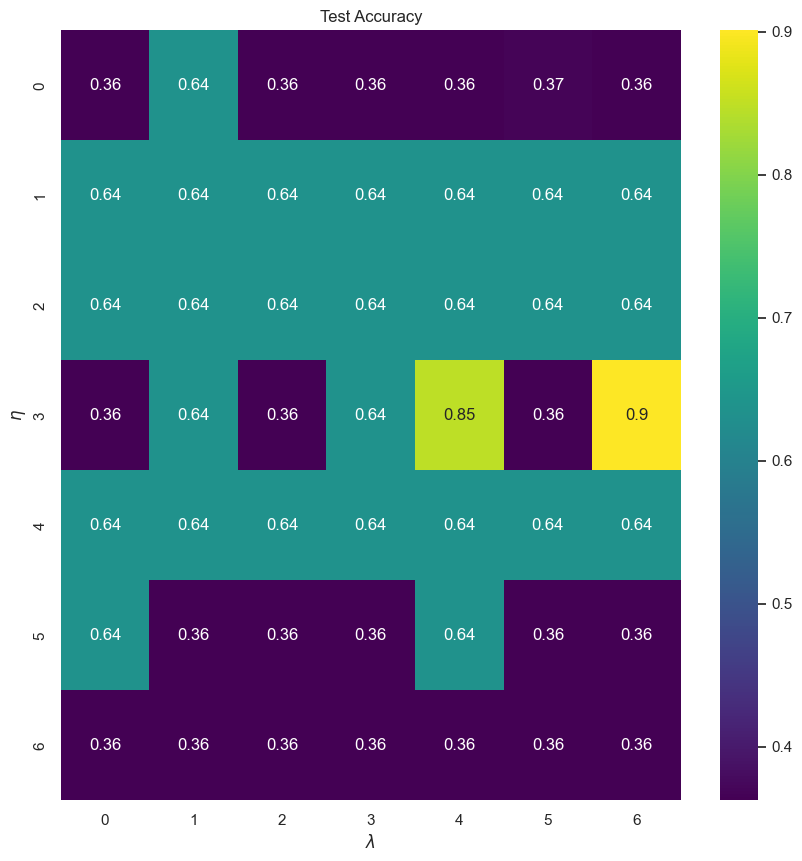

In [115]:
n_inputs, n_features = X.shape
n_hidden_neurons = 2
n_categories = 1
hidden_layers = 2

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def CostCrossEntropy(target):
    
    def func(X):
        return -(1.0 / target.size) * np.sum(target * np.log(X[:,0] + 10e-10))

    return func

# Both hidden_layers +1 in length

#feed forward pass
def feed_forward(X, weights, biases, hidden_layers):
    # retrns the outputs of each layer
    outputs = []
    input_next = X
    for i in range(hidden_layers + 1): # +1 because appending output of network as well
        z = np.matmul(input_next, weights[i]) + biases[i]
        # activation in each layer
        a = sigmoid(z)
        # make sure that the next hidden layer has output layer before as input
        input_next = a
        #append and return all the outputs for the backpropagation part
        outputs.append(a)
    return outputs

def give_error(error_layer, i, outputs):
    #calculates the deltas/errors of each layer
    #if it is calculated, dont calculate again. Only used for i=0
    if i < len(error_layer):
        return(error_layer[i])
    else:
        #calculate the error/delta of a layer
        error_layer.append(np.matmul(error_layer[i - 1], weights[-i].T) * outputs[-i] * (1 - outputs[-i]))
        return error_layer[i]

def backpropagation(X, Y, outputs, eta, lmbd):
    #error_layer[0] is the last layer, error_layer[-1] is the first layer
    error_layer = []
    # error in the output layer
    error_layer.append(outputs[-1] - Y)

    # gradients for the output layer
    for i in range(hidden_layers): # Updating every layer except the first hidden layer
        # index - 2 because we want to grab the layers BEFORE the output layer
        curr_error = give_error(error_layer, i, outputs)

        # gradient for the hidden layer
        weights_gradient = np.matmul(outputs[-2-i].T, curr_error)
        bias_gradient = np.sum(curr_error, axis=0)

        bias_gradient += lmbd * biases[-1-i]
        weights_gradient += lmbd * weights[-1-i]

        biases[-1-i] -= eta * bias_gradient
        weights[-1-i] -= eta * weights_gradient
       

    # Updating the first hidden layer (out of the loop)
    error_first_h = give_error(error_layer, hidden_layers, outputs)
    weights_gradient = np.matmul(X.T, error_first_h)
    bias_gradient = np.sum(error_first_h, axis=0)

    bias_gradient += lmbd * biases[0]
    weights_gradient += lmbd * weights[0]

    biases[0] -= eta * bias_gradient
    weights[0] -= eta * weights_gradient

eta_vals = np.logspace(-5, 1, 7)
lmbd_vals =  np.logspace(-5, 1, 7)

def network(X, weights, biases, hidden_layers, eta, lmbd):
    for i in range(100):
        result = feed_forward(X, weights, biases, hidden_layers)
        backpropagation(X, y, result, eta, lmbd)

    return feed_forward(X, weights, biases, hidden_layers)[-1] #works


sns.set()
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        weights = []
        #appending the first hidden layer
        weights.append(np.random.randn(n_features, n_hidden_neurons))
        #appending the rest of the hidden layers
        for _ in range(hidden_layers - 1):
            weights.append(np.random.randn(n_hidden_neurons, n_hidden_neurons))
        #appending weight of output layer
        weights.append(np.random.randn(n_hidden_neurons, n_categories))

        biases = []
        for _ in range(hidden_layers):
            biases.append(np.zeros(n_hidden_neurons) + 0.01)
        biases.append(np.zeros(n_categories) + 0.01)

        a_o = network(X, weights, biases, hidden_layers, eta_vals[i], lmbd_vals[i]) 
        a_o_thresholded = (a_o >= 0.5).astype(int)
        test_pred = a_o_thresholded
        test_accuracy[i][j] = accuracy_score(y_train, test_pred)


fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()


### Part c): Testing different activation functions

You should now also test different activation functions for the hidden layers. Try out the Sigmoid, the RELU and the Leaky RELU functions and discuss your results. You may also study the way you initialize your weights and biases.

### Part d): Classification  analysis using neural networks

With a well-written code it should now be easy to change the
activation function for the output layer.

Here we will change the cost function for our neural network code
developed in parts b) and c) in order to perform a classification analysis. 

We will here study the Wisconsin Breast Cancer  data set. This is a typical binary classification problem with just one single output, either True or Fale, $0$ or $1$ etc.
You find more information about this at the [Scikit-Learn
site](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) or at the [University of California
at Irvine](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)). 

To measure the performance of our classification problem we use the
so-called *accuracy* score.  The accuracy is as you would expect just
the number of correctly guessed targets $t_i$ divided by the total
number of targets, that is

$$
\text{Accuracy} = \frac{\sum_{i=1}^n I(t_i = y_i)}{n} ,
$$

where $I$ is the indicator function, $1$ if $t_i = y_i$ and $0$
otherwise if we have a binary classification problem. Here $t_i$
represents the target and $y_i$ the outputs of your FFNN code and $n$ is simply the number of targets $t_i$.

Discuss your results and give a critical analysis of the various parameters, including hyper-parameters like the learning rates and the regularization parameter $\lambda$ (as you did in Ridge Regression), various activation functions, number of hidden layers and nodes and activation functions.  

As stated in the introduction, it can also be useful to study other
datasets. 

Again, we strongly recommend that you compare your own neural Network
code for classification and pertinent results against a similar code using **Scikit-Learn**  or **tensorflow/keras** or **pytorch**.

### Part e): Write your Logistic Regression code, final step

Finally, we want to compare the FFNN code we have developed with
Logistic regression, that is we wish to compare our neural network
classification results with the results we can obtain with another
method.

Define your cost function and the design matrix before you start writing your code.
Write thereafter a Logistic regression code using your SGD algorithm. You can also use standard gradient descent in this case, with a learning rate as hyper-parameter.
Study the results as functions of the chosen learning rates.
Add also an $l_2$ regularization parameter $\lambda$. Compare your results with those from your FFNN code as well as those obtained using **Scikit-Learn**'s logistic regression functionality.

The weblink  here <https://medium.com/ai-in-plain-english/comparison-between-logistic-regression-and-neural-networks-in-classifying-digits-dc5e85cd93c3>compares logistic regression and FFNN using the so-called MNIST data set. You may find several useful hints and ideas from this article.

### Part f) Critical evaluation of the various algorithms

After all these glorious calculations, you should now summarize the
various algorithms and come with a critical evaluation of their pros
and cons. Which algorithm works best for the regression case and which
is best for the classification case. These codes can also be part of
your final project 3, but now applied to other data sets.

## Background literature

1. The text of Michael Nielsen is highly recommended, see [Nielsen's book](http://neuralnetworksanddeeplearning.com/). It is an excellent read.

2. [Mehta et al, arXiv 1803.08823](https://arxiv.org/abs/1803.08823), *A high-bias, low-variance introduction to Machine Learning for physicists*, ArXiv:1803.08823.

c. [Goodfellow, Bengio and Courville](https://www.deeplearningbook.org/), *Deep Learning*.

## Introduction to numerical projects

Here follows a brief recipe and recommendation on how to write a report for each
project.

  * Give a short description of the nature of the problem and the eventual  numerical methods you have used.

  * Describe the algorithm you have used and/or developed. Here you may find it convenient to use pseudocoding. In many cases you can describe the algorithm in the program itself.

  * Include the source code of your program. Comment your program properly.

  * If possible, try to find analytic solutions, or known limits in order to test your program when developing the code.

  * Include your results either in figure form or in a table. Remember to        label your results. All tables and figures should have relevant captions        and labels on the axes.

  * Try to evaluate the reliabilty and numerical stability/precision of your results. If possible, include a qualitative and/or quantitative discussion of the numerical stability, eventual loss of precision etc.

  * Try to give an interpretation of you results in your answers to  the problems.

  * Critique: if possible include your comments and reflections about the  exercise, whether you felt you learnt something, ideas for improvements and  other thoughts you've made when solving the exercise. We wish to keep this course at the interactive level and your comments can help us improve it.

  * Try to establish a practice where you log your work at the  computerlab. You may find such a logbook very handy at later stages in your work, especially when you don't properly remember  what a previous test version  of your program did. Here you could also record  the time spent on solving the exercise, various algorithms you may have tested or other topics which you feel worthy of mentioning.

## Format for electronic delivery of report and programs

The preferred format for the report is a PDF file. You can also use DOC or postscript formats or as an ipython notebook file.  As programming language we prefer that you choose between C/C++, Fortran2008 or Python. The following prescription should be followed when preparing the report:

  * Use Canvas to hand in your projects, log in  at  <https://www.uio.no/english/services/it/education/canvas/> with your normal UiO username and password.

  * Upload **only** the report file or the link to your GitHub/GitLab or similar typo of  repos!  For the source code file(s) you have developed please provide us with your link to your GitHub/GitLab or similar  domain.  The report file should include all of your discussions and a list of the codes you have developed.  Do not include library files which are available at the course homepage, unless you have made specific changes to them.

  * In your GitHub/GitLab or similar repository, please include a folder which contains selected results. These can be in the form of output from your code for a selected set of runs and input parameters.

Finally, 
we encourage you to collaborate. Optimal working groups consist of 
2-3 students. You can then hand in a common report.